# Machine Learning Portfolio: From-Scratch Implementations

**Author:** Aarush Chhiber

This project showcases implementations of fundamental machine learning algorithms built from scratch, demonstrating deep understanding of the underlying mathematics and concepts.

## Project Overview

| Model | Framework | Task | Dataset |
|-------|-----------|------|----------|
| Neural Network | NumPy | Classification | California Housing |
| CNN | PyTorch | Image Classification | Brain Tumor MRI |
| Random Forest | NumPy + sklearn | Classification | Dry Bean |
| RNN/LSTM | TensorFlow | Text Generation | Custom Text |


---
## Environment Setup


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

print("Environment Information")
print(f"Python: {sys.version}")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

%load_ext autoreload
%autoreload 2


Environment Information
Python: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:46:49) [Clang 19.1.7 ]
NumPy: 1.24.4
Matplotlib: 3.10.8


---
# Part 1: Neural Network from Scratch

A two-layer fully connected neural network implemented entirely in NumPy. This implementation includes:

- **SiLU (Swish) Activation**: A smooth, self-gated activation function
- **Dropout Regularization**: Prevents overfitting by randomly zeroing neurons
- **Adam Optimizer**: Adaptive learning rates for faster convergence
- **Mini-batch Gradient Descent**: Efficient training on large datasets

## Architecture

```
Input (8) → Dense (15) → SiLU → Dropout → Dense (7) → SiLU → Dense (3) → Softmax
```


In [2]:
from utilities.utils import get_housing_dataset
from NN import NeuralNet

# Load California Housing dataset (converted to 3-class classification)
x_train, y_train, x_test, y_test = get_housing_dataset()
print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")
print(f"Features: {x_train.shape[1]}")
print(f"Classes: {y_train.shape[1]}")


Training samples: 375
Test samples: 125
Features: 8
Classes: 3


### Training with Gradient Descent


In [3]:
# Train with vanilla gradient descent
nn_gd = NeuralNet(y_train, lr=0.01, use_dropout=False, use_adam=False)
nn_gd.gradient_descent(x_train, y_train, iter=60000)


Loss after iteration 0: 1.0862756213859805
Loss after iteration 1000: 1.03278950101803
Loss after iteration 2000: 0.9031315384447826
Loss after iteration 3000: 0.7284301384867246
Loss after iteration 4000: 0.6561706158061817
Loss after iteration 5000: 0.6217327234188922
Loss after iteration 6000: 0.5988120553289241
Loss after iteration 7000: 0.5822879248615845
Loss after iteration 8000: 0.5701766034027348
Loss after iteration 9000: 0.5610032298179435
Loss after iteration 10000: 0.5537096385605493
Loss after iteration 11000: 0.5477691165155584
Loss after iteration 12000: 0.5430227145511541
Loss after iteration 13000: 0.5393421213551995
Loss after iteration 14000: 0.5364731129139662
Loss after iteration 15000: 0.5341563805042095
Loss after iteration 16000: 0.5322098039043119
Loss after iteration 17000: 0.530514963404147
Loss after iteration 18000: 0.5289957709779667
Loss after iteration 19000: 0.5276025700255653
Loss after iteration 20000: 0.5263005403271779
Loss after iteration 21000: 0

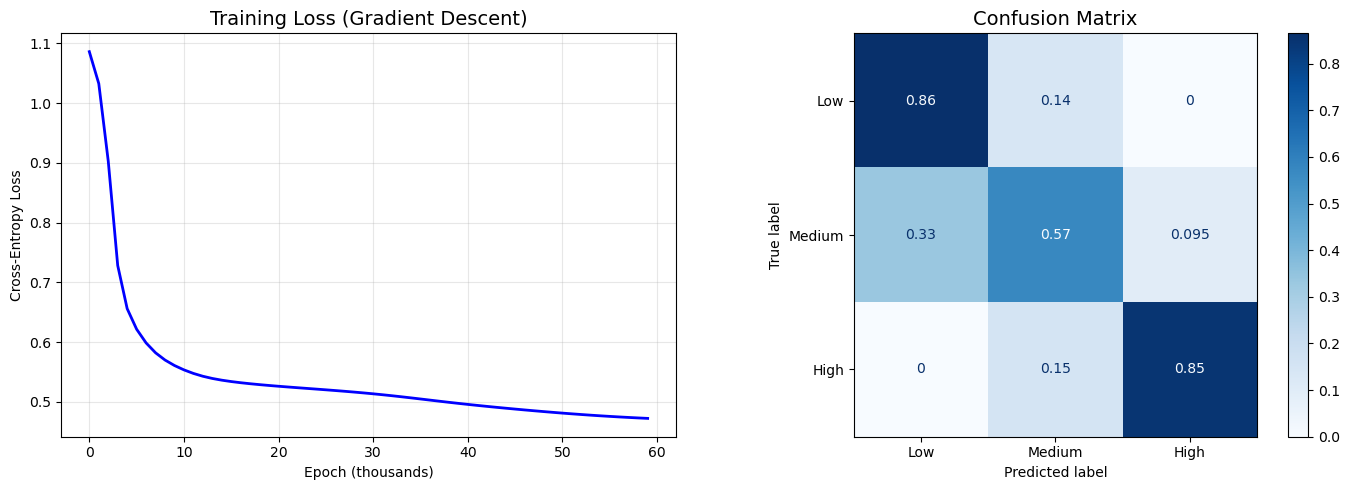


Final Test Loss: 0.7293
Test Accuracy: 76.00%


In [4]:
# Visualize training
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(nn_gd.loss, 'b-', linewidth=2)
axes[0].set_title('Training Loss (Gradient Descent)', fontsize=14)
axes[0].set_xlabel('Epoch (thousands)')
axes[0].set_ylabel('Cross-Entropy Loss')
axes[0].grid(True, alpha=0.3)

# Confusion matrix
y_true = np.argmax(y_test, axis=1)
y_pred = nn_gd.predict(x_test)
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, 
    normalize='true', 
    display_labels=['Low', 'Medium', 'High'],
    ax=axes[1],
    cmap='Blues'
)
axes[1].set_title('Confusion Matrix', fontsize=14)

plt.tight_layout()
plt.show()

# Final metrics
y_hat = nn_gd.forward(x_test, use_dropout=False)
print(f"\nFinal Test Loss: {nn_gd.cross_entropy_loss(y_test, y_hat):.4f}")
print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.2%}")


### Training with Adam Optimizer + Dropout


In [5]:
# Train with Adam optimizer and dropout
nn_adam = NeuralNet(y_train, lr=0.0001, batch_size=64, use_dropout=True, use_adam=True)
nn_adam.minibatch_gradient_descent(x_train, y_train, iter=60000)


Loss after iteration 0: 1.0928688154498045
Loss after iteration 1000: 1.050759656827693
Loss after iteration 2000: 0.9050269871587595
Loss after iteration 3000: 0.8412585825171359
Loss after iteration 4000: 0.8944224767581495
Loss after iteration 5000: 0.7074458678781397
Loss after iteration 6000: 0.7209375591893933
Loss after iteration 7000: 0.7433210745945303
Loss after iteration 8000: 0.5725231273153891
Loss after iteration 9000: 0.6574780623447254
Loss after iteration 10000: 0.7221674081111198
Loss after iteration 11000: 0.5510848391230003
Loss after iteration 12000: 0.5825974432593155
Loss after iteration 13000: 0.8638433627349511
Loss after iteration 14000: 0.5277308048438897
Loss after iteration 15000: 0.603558826439033
Loss after iteration 16000: 0.7340395817741223
Loss after iteration 17000: 0.4917330004289391
Loss after iteration 18000: 0.5139344363248517
Loss after iteration 19000: 0.745697923571536
Loss after iteration 20000: 0.41964537028841165
Loss after iteration 21000: 

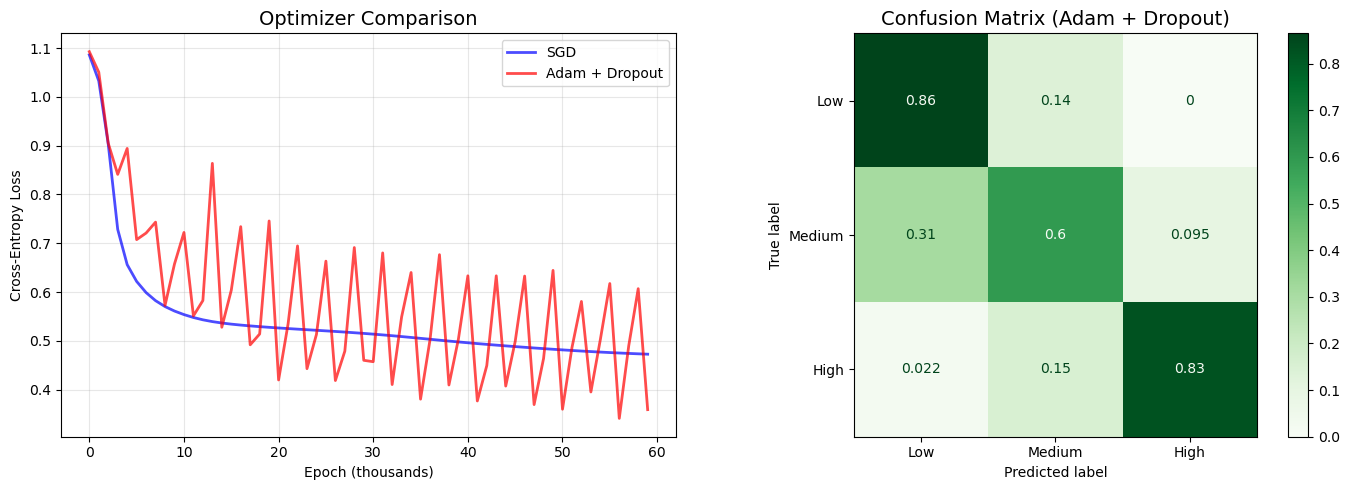


Adam Test Loss: 0.6425
Adam Test Accuracy: 76.00%


In [6]:
# Compare results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(nn_gd.loss, 'b-', label='SGD', linewidth=2, alpha=0.7)
axes[0].plot(nn_adam.loss, 'r-', label='Adam + Dropout', linewidth=2, alpha=0.7)
axes[0].set_title('Optimizer Comparison', fontsize=14)
axes[0].set_xlabel('Epoch (thousands)')
axes[0].set_ylabel('Cross-Entropy Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

y_pred_adam = nn_adam.predict(x_test)
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred_adam, 
    normalize='true', 
    display_labels=['Low', 'Medium', 'High'],
    ax=axes[1],
    cmap='Greens'
)
axes[1].set_title('Confusion Matrix (Adam + Dropout)', fontsize=14)

plt.tight_layout()
plt.show()

y_hat_adam = nn_adam.forward(x_test, use_dropout=False)
print(f"\nAdam Test Loss: {nn_adam.cross_entropy_loss(y_test, y_hat_adam):.4f}")
print(f"Adam Test Accuracy: {accuracy_score(y_true, y_pred_adam):.2%}")


---
# Part 2: Convolutional Neural Network (PyTorch)

A CNN implementation for brain tumor MRI classification. The model classifies brain MRI scans into 4 categories:

1. **Glioma** - Tumor arising from glial cells
2. **Meningioma** - Tumor from meninges membranes
3. **No Tumor** - Healthy brain scan
4. **Pituitary** - Tumor in the pituitary gland

## Features
- Data augmentation (rotation, flip, translation)
- Adaptive pooling for flexible input sizes
- Learning rate scheduling


In [7]:
import torch
from cnn import CNN
from cnn_trainer import Trainer
from cnn_image_transformations import (
    TransformedDataset,
    create_training_transformations,
    create_testing_transformations,
)
from utilities.utils import get_mri_dataset

# Load and preprocess MRI data
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
x_train_mri, y_train_mri, x_test_mri, y_test_mri = get_mri_dataset(classes)

# Apply transformations
train_transform = create_training_transformations()
test_transform = create_testing_transformations()

trainset = TransformedDataset(x_train_mri, y_train_mri, transform=train_transform)
testset = TransformedDataset(x_test_mri, y_test_mri, transform=test_transform)

print(f"Training set: {trainset.data.shape}")
print(f"Test set: {testset.data.shape}")


Loading preprocessed data from disk...
Training set: torch.Size([5712, 1, 84, 84])
Test set: torch.Size([1311, 1, 84, 84])


In [8]:
# Initialize and train CNN
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Training on: {device}")

model = CNN()
print("\nModel Architecture:")
print(model)

trainer = Trainer(model, trainset, testset, device=device)
trainer.tune()


Training on: cpu

Model Architecture:
CNN(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avg_pooling): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=4, bias=True)
  )
)


Epoch 1/10: 100%|██████████| 179/179 [00:13<00:00, 13.36batch/s, accuracy=0.66, loss=0.417] 


Epoch 1: Validation Loss: 0.80, Validation Accuracy: 0.677


Epoch 2/10: 100%|██████████| 179/179 [00:12<00:00, 14.11batch/s, accuracy=0.761, loss=0.309]


Epoch 2: Validation Loss: 0.64, Validation Accuracy: 0.757


Epoch 3/10: 100%|██████████| 179/179 [00:12<00:00, 14.21batch/s, accuracy=0.788, loss=0.276]


Epoch 3: Validation Loss: 0.61, Validation Accuracy: 0.757


Epoch 4/10: 100%|██████████| 179/179 [00:12<00:00, 13.83batch/s, accuracy=0.797, loss=0.259]


Epoch 4: Validation Loss: 0.63, Validation Accuracy: 0.768


Epoch 5/10: 100%|██████████| 179/179 [00:13<00:00, 13.44batch/s, accuracy=0.819, loss=0.24] 


Epoch 5: Validation Loss: 0.59, Validation Accuracy: 0.764


Epoch 6/10: 100%|██████████| 179/179 [00:12<00:00, 13.99batch/s, accuracy=0.826, loss=0.229]


Epoch 6: Validation Loss: 0.50, Validation Accuracy: 0.793


Epoch 7/10: 100%|██████████| 179/179 [00:12<00:00, 14.09batch/s, accuracy=0.838, loss=0.218]


Epoch 7: Validation Loss: 0.49, Validation Accuracy: 0.794


Epoch 8/10: 100%|██████████| 179/179 [00:12<00:00, 14.16batch/s, accuracy=0.85, loss=0.206] 


Epoch 8: Validation Loss: 0.53, Validation Accuracy: 0.795


Epoch 9/10: 100%|██████████| 179/179 [00:12<00:00, 14.19batch/s, accuracy=0.852, loss=0.2]  


Epoch 9: Validation Loss: 0.50, Validation Accuracy: 0.791


Epoch 10/10: 100%|██████████| 179/179 [00:12<00:00, 14.14batch/s, accuracy=0.862, loss=0.189]


Epoch 10: Validation Loss: 0.50, Validation Accuracy: 0.807


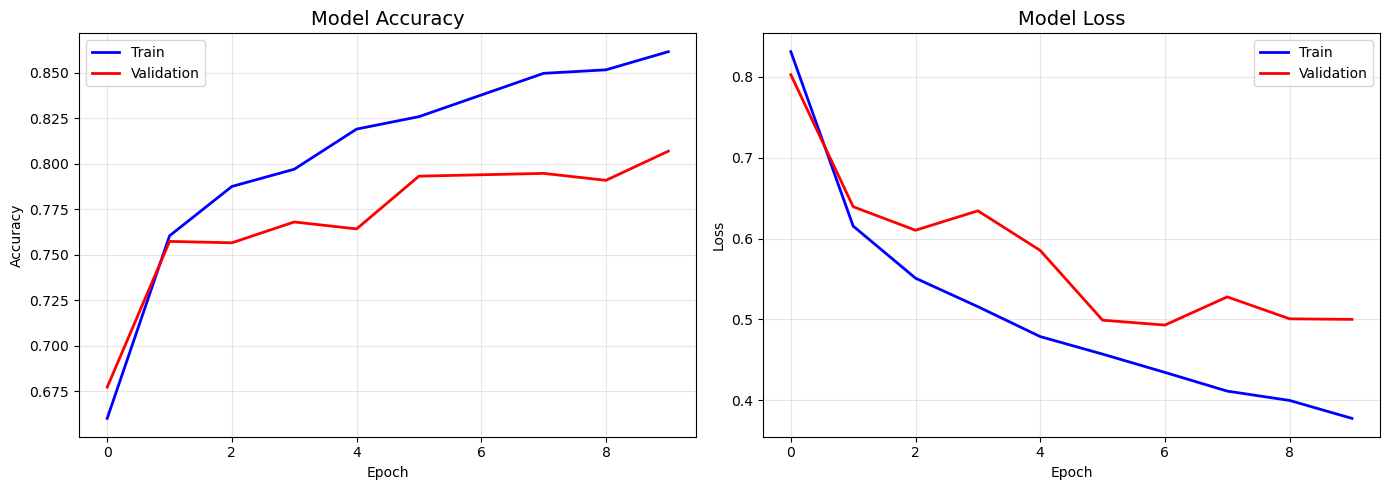

In [9]:
# Visualize training history
train_loss, train_acc, val_loss, val_acc = trainer.get_training_history()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(train_acc, 'b-', label='Train', linewidth=2)
axes[0].plot(val_acc, 'r-', label='Validation', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(train_loss, 'b-', label='Train', linewidth=2)
axes[1].plot(val_loss, 'r-', label='Validation', linewidth=2)
axes[1].set_title('Model Loss', fontsize=14)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


---
# Part 3: Random Forest Classifier

A Random Forest implementation using bootstrap aggregating (bagging) with ExtraTreeClassifiers. Features include:

- **Bootstrap Sampling**: Random sampling with replacement
- **Feature Subsampling**: Random feature selection per tree
- **Out-of-Bag Scoring**: Validation without held-out set
- **AdaBoost**: Adaptive boosting variant
- **Hyperparameter Grid Search**: Automated tuning


In [10]:
import pandas as pd
from sklearn import preprocessing
from random_forest import RandomForest

# Load Dry Bean dataset
df = pd.read_csv('./data/Dry_Bean_Dataset.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nBean classes: {df['Class'].unique()}")

# Prepare data
label_encoder = preprocessing.LabelEncoder()
X = df.drop(['Class'], axis=1)
y = label_encoder.fit_transform(df['Class'])

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X, y, test_size=0.33, random_state=42
)
X_train_rf, X_test_rf = np.array(X_train_rf), np.array(X_test_rf)
y_train_rf, y_test_rf = np.array(y_train_rf), np.array(y_test_rf)

print(f"\nTraining samples: {X_train_rf.shape[0]}")
print(f"Test samples: {X_test_rf.shape[0]}")


Dataset shape: (13611, 17)

Bean classes: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']

Training samples: 9119
Test samples: 4492


In [11]:
# Hyperparameter grid search
rf = RandomForest(0, 0, None)
permutations = rf.hyperparameter_grid_search(
    n_estimators_range=(8, 10, 1),
    max_depth_range=(8, 10, 1),
    max_features_range=(0.7, 1.0, 0.1)
)
print(f"Testing {len(permutations)} hyperparameter combinations...")

best_rf = None
best_accuracy = 0
random_seed = 4641 + 7641

for n, (n_estimators, max_depth, max_features) in enumerate(permutations):
    rf = RandomForest(n_estimators, max_depth, max_features, random_seed=random_seed)
    rf.fit(X_train_rf, y_train_rf)
    accuracy = rf.OOB_score(X_test_rf, y_test_rf)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_rf = rf
        best_params = (n_estimators, max_depth, max_features)
    
    if (n + 1) % 10 == 0:
        print(f"Checked {n + 1}/{len(permutations)} combinations")

print(f"\nBest Parameters: n_estimators={best_params[0]}, max_depth={best_params[1]}, max_features={best_params[2]:.1f}")
print(f"Best OOB Accuracy: {best_accuracy:.2%}")


Testing 36 hyperparameter combinations...
Checked 10/36 combinations
Checked 20/36 combinations
Checked 30/36 combinations

Best Parameters: n_estimators=8, max_depth=9, max_features=1.0
Best OOB Accuracy: 86.93%


<Figure size 1000x800 with 0 Axes>

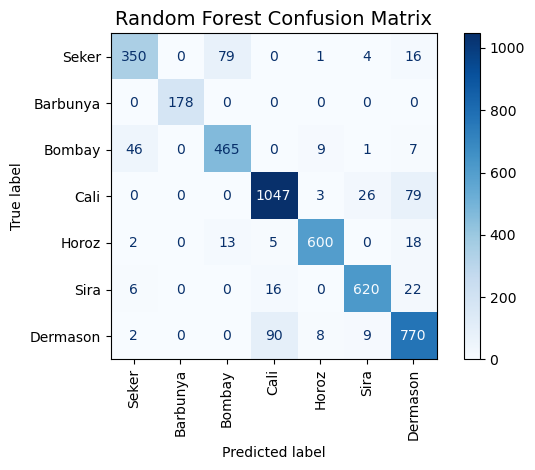

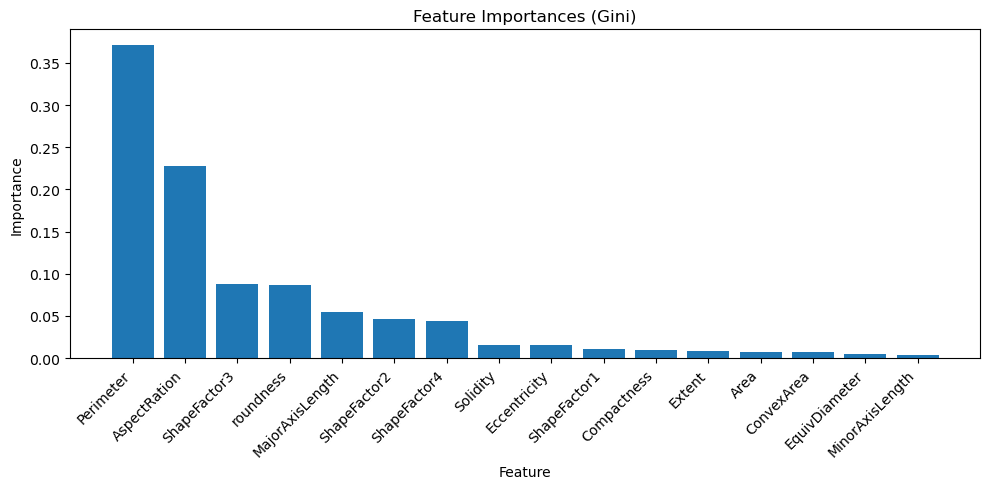

In [12]:
# Evaluate best model
pred_rf = best_rf.predict(X_test_rf)
labels_rf = ['Seker', 'Barbunya', 'Bombay', 'Cali', 'Horoz', 'Sira', 'Dermason']

plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(
    y_test_rf, pred_rf, 
    display_labels=labels_rf,
    xticks_rotation='vertical',
    cmap='Blues'
)
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()

# Feature importance
best_rf.plot_feature_importance(X)


---
# Part 4: Recurrent Neural Networks for Text Generation

Character-level language models using RNN and LSTM architectures. These models learn to predict the next character in a sequence, enabling text generation.

> **Note:** This section requires TensorFlow. If TensorFlow causes kernel crashes, you may need to:
> - Install a compatible TensorFlow version: `pip install tensorflow==2.15.0`
> - Or skip this section and focus on the NumPy/PyTorch implementations

## Architectures

### Simple RNN
```
Embedding → SimpleRNN → Dense → Softmax
```

### LSTM
```
Embedding → LSTM → Dense → Softmax
```

LSTMs can capture longer-range dependencies due to their gating mechanisms.


In [2]:
# TensorFlow setup
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TF warnings

TF_AVAILABLE = False

try:
    import tensorflow as tf
    print(f"TensorFlow version: {tf.__version__}")
    TF_AVAILABLE = True
except Exception as e:
    print(f"TensorFlow not available: {e}")
    print("\nTo fix, create the ml_portfolio environment:")
    print("  cd environment && conda env create -f environment.yml")
    print("  conda activate ml_portfolio")

if TF_AVAILABLE:
    import requests
    from utilities.utils import preprocess_text_data
    from rnn import RNN
    from lstm import LSTM
    from text_generator import TextGenerator

    # Load sample text (Shakespeare)
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
    response = requests.get(url)
    text = response.text[:50000]  # Use first 50k characters

    # Preprocess
    data = preprocess_text_data(text)
    print(f"\nText length: {len(data['text'])} characters")
    print(f"Vocabulary size: {data['vocab_size']}")
    print(f"Training sequences: {data['x'].shape[0]}")
    print(f"\nSample text:\n{data['text'][:500]}")


TensorFlow version: 2.15.0

Text length: 49574 characters
Vocabulary size: 35
Training sequences: 49544

Sample text:
first citizen: before we proceed any further, hear me speak. all: speak, speak. first citizen: you are all resolved rather to die than to famish? all: resolved. resolved. first citizen: first, you know caius marcius is chief enemy to the people. all: we know't, we know't. first citizen: let us kill him, and we'll have corn at our own price. is't a verdict? all: no more talking on't; let it be done: away, away! second citizen: one word, good citizens. first citizen: we are accounted poor citizens


In [3]:
if TF_AVAILABLE:
    # Initialize models
    rnn_model = RNN(data['vocab_size'], data['sequence_len'])
    rnn_model.set_hyperparameters()
    rnn_model.define_model()
    rnn_model.build_model()

    lstm_model = LSTM(data['vocab_size'], data['sequence_len'])
    lstm_model.set_hyperparameters()
    lstm_model.define_model()
    lstm_model.build_model()

    print("RNN Model:")
    rnn_model.model.summary()
    print("\nLSTM Model:")
    lstm_model.model.summary()
else:
    print("Skipping model initialization - TensorFlow not available")


RNN Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         8960      
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense (Dense)               (None, 35)                4515      
                                                                 
 activation (Activation)     (None, 35)                0         
                                                                 
Total params: 62755 (245.14 KB)
Trainable params: 62755 (245.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

LSTM Model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Sh

In [4]:
if TF_AVAILABLE:
    # Train models (or load if already trained)
    rnn_model.train(data['x'], data['y'])
    lstm_model.train(data['x'], data['y'])
else:
    print("Skipping model training - TensorFlow not available")


Training RNN model from scratch...
Epoch 1/10
388/388 [==============================] - 6s 14ms/step - loss: 2.3287 - lr: 0.0100
Epoch 2/10
388/388 [==============================] - 6s 14ms/step - loss: 2.0032 - lr: 0.0100
Epoch 3/10
388/388 [==============================] - 6s 15ms/step - loss: 1.9503 - lr: 0.0100
Epoch 4/10
388/388 [==============================] - 6s 16ms/step - loss: 1.9342 - lr: 0.0100
Epoch 5/10
388/388 [==============================] - 7s 17ms/step - loss: 1.9268 - lr: 0.0100
Epoch 6/10
388/388 [==============================] - 6s 17ms/step - loss: 1.9214 - lr: 0.0100
Epoch 7/10
388/388 [==============================] - 7s 19ms/step - loss: 1.9263 - lr: 0.0100
Epoch 8/10
388/388 [==============================] - 8s 21ms/step - loss: 1.7339 - lr: 0.0020
Epoch 9/10
388/388 [==============================] - 9s 24ms/step - loss: 1.6620 - lr: 0.0020
Epoch 10/10
388/388 [==============================] - 10s 27ms/step - loss: 1.6309 - lr: 0.0020
Saved RNN mod

In [5]:
if TF_AVAILABLE:
    # Generate text
    generator = TextGenerator(data['char_indices'], data['indices_char'], data['sequence_len'])

    seed = "to be or not to be that is the"
    print("\n" + "="*60)
    generator.generate(rnn_model, seed, length=200, temperature=0.5)
    print("="*60)
    generator.generate(lstm_model, seed, length=200, temperature=0.5)
    print("="*60)
else:
    print("Skipping text generation - TensorFlow not available")



-------------------- RNN Model --------------------
Prompt: to be or not to be that is the
Model:  gods the well. male he good they the should for how you canneral, so come, than will and in and reper of the worsent the common and messt my when enant, in and and of the would now he caverel i and t
-------------------- LSTM Model --------------------
Prompt: to be or not to be that is the
Model:  war i shall him the war. aufidius: if it thank in the came him to your shall he the people, with his done thou shall plaebal, i war, with scontont humbor, whom would with the war a mindicion, with th


---
## Summary

This project demonstrates implementations of key machine learning algorithms:

1. **Neural Networks**: Complete from-scratch implementation with forward/backward propagation, various optimizers, and regularization techniques.

2. **CNNs**: Medical image classification using convolutional architectures with data augmentation and learning rate scheduling.

3. **Random Forests**: Ensemble learning with bootstrap aggregation, out-of-bag evaluation, and feature importance analysis.

4. **RNNs/LSTMs**: Sequence modeling for text generation, demonstrating the difference between simple recurrence and gated architectures.

